In [282]:
import pandas as pd
import numpy as np

df = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/dictionaries/all_skills.csv')
df = df.drop_duplicates()

In [283]:
df = df.reset_index().drop(['index'], axis = 1)

In [284]:
l1 = []
l2 = []
for i in range(0, len(df['Skill'])):
    l1.append(df['Skill'][i])
    l2.append({'entities': [(0, len(df['Skill'][i]), df['Label'][i])]})
    
train_data = list(zip(l1, l2))

In [285]:
train_data[0:3]

[('Access software', {'entities': [(0, 15, 'SKILL')]}),
 ('Cisco AnyConnect', {'entities': [(0, 16, 'SKILL')]}),
 ('Calendar and scheduling software', {'entities': [(0, 32, 'SKILL')]})]

In [348]:
%%time
import spacy
from spacy import displacy
from spacy.tokens import DocBin
from spacy.training.example import Example
from tqdm import tqdm

np.random.seed(42)

# set blank 'en' model 
nlp = spacy.blank('en')

# set pipeline
# ner = nlp.create_pipe("ner")
nlp.add_pipe('ner')

# for _, annotations in train_data:
#     for ent in annotations.get('entities'):
#         ner.add_label(ent[2])
        
# other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
# with nlp.disable_pipes(*other_pipes):  # only train NER
optimizer = nlp.begin_training()
epoch = 0
all_losses = []
for batch in spacy.util.minibatch(train_data, size=1):
    np.random.shuffle(train_data)
    losses = {}
    for text, annotations in batch:
            doc = nlp.make_doc(text)
            example = Example.from_dict(doc, annotations)
            # Update the model
            nlp.update([example], sgd = optimizer, losses=losses, drop=0.81)
            epoch += 1
            all_losses.append(losses)

CPU times: user 1min 45s, sys: 370 ms, total: 1min 45s
Wall time: 1min 45s


In [349]:
all_losses = [all_losses[i]['ner'] for i in range(len(all_losses))]

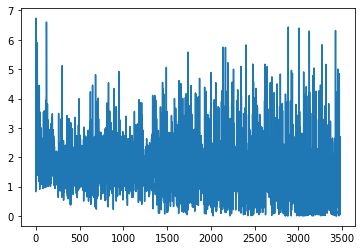

In [350]:
import matplotlib.pyplot as plt

x = list(range(len(all_losses)))
y = all_losses

plt.plot(x, y)

In [351]:
from pathlib import Path

output_dir = Path('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1')
output_dir.mkdir()
nlp.to_disk(output_dir)

FileExistsError: [Errno 17] File exists: '/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1'

In [ ]:
df = pd.read_csv('/home/macrodrigues/code/macrodrigues/skills_matcher/data/cleaned_data.csv')
df = df.dropna()

In [355]:
raw_text= df.description[460]

nlp2 = spacy.load('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model_1')
doc = nlp(raw_text)
doc2 = nlp2(raw_text)

ents = [(e.text, e.start, e.end, e.label_) for e in doc.ents]
ents2 = [(e.text, e.start, e.end, e.label_) for e in doc2.ents]
#print(ents)
displacy.render(doc, style="ent")
#displacy.render(doc2, style="ent")

ents

[('Applying gene editing technique', 1, 5, 'SKILL'),
 ('Design and conduct molecular', 17, 21, 'SKILL'),
 ('of action study', 27, 30, 'SKILL'),
 ('Designing and executing product', 35, 39, 'SKILL'),
 ('Communicating scientific findings', 42, 45, 'SKILL'),
 ('-technical', 54, 56, 'SKILL'),
 ('and oral presentations', 58, 61, 'SKILL'),
 ('Preparing technical reports', 62, 65, 'SKILL'),
 ('Maintaining appropriate R&D', 68, 71, 'SKILL'),
 ('e.g. Laboratory notebooks)', 73, 77, 'SKILL'),
 ('; procurement of research materials', 77, 82, 'SKILL'),
 ('in molecular biology', 89, 92, 'SKILL'),
 ('microbial Genetics', 98, 100, 'SKILL'),
 ('or related field', 102, 105, 'SKILL'),
 ('Minimum of 3 years', 106, 110, 'SKILL'),
 ('an industrial or research lab studying soil', 113, 120, 'SKILL'),
 ('plant microbiology or equivalent Strong skills', 121, 127, 'SKILL'),
 ('gene editing techniques', 128, 131, 'SKILL'),
 ('Expertise and extensive research', 134, 138, 'SKILL'),
 ('plant endophytes', 143, 145, 

In [ ]:
nlp_skills = spacy.load('/home/macrodrigues/code/macrodrigues/skills_matcher/data/model')
nlp_en = spacy.load("en_core_web_sm")
nlp_en.add_pipe(ner, name="ner_skills")

doc3 = nlp_en(raw_text)
ents3 = [(e.text, e.start, e.end, e.label_) for e in doc3.ents]

In [326]:
import os

os.getcwd()

'/home/macrodrigues/code/macrodrigues/skills_matcher/notebooks'

In [328]:
os.path.dirname(os.path.dirname(os.getcwd()))

'/home/macrodrigues/code/macrodrigues'